<a href="https://colab.research.google.com/github/Chiragjain0911/Customer-Churn-Analysis/blob/main/telcom_customer_churn__analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df= pd.read_csv('/content/Telco-Customer-Churn.csv')
df.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6023,4698-KVLLG,Female,1,No,No,51,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.60,967.9,No
6052,2516-XSJKX,Female,0,Yes,Yes,41,Yes,No,DSL,Yes,...,No,Yes,Yes,Yes,Two year,No,Electronic check,78.45,3126.45,No
6263,8409-WQJUX,Female,0,No,No,25,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,54.20,1423.15,No


In [6]:
df.shape

(7043, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


replacing blanks with 0 in total charges as tenure is 0 and no charges recorded in total charges and also change data type into float

In [8]:
df['TotalCharges'] = df['TotalCharges'].replace(" ","0")
df["total Charges"] = df["TotalCharges"].astype(float)

In [9]:
df.isnull().sum().sum()

np.int64(0)

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,total Charges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
df.duplicated().sum()

np.int64(0)

change value of senior citizen to yes and no for make it easier to understand

In [12]:
def conv(value):
  if value == 1:
    return 'yes'
  else:
    return 'no'

df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,total Charges
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.85
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,1889.50
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,108.15
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1840.75
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,151.65


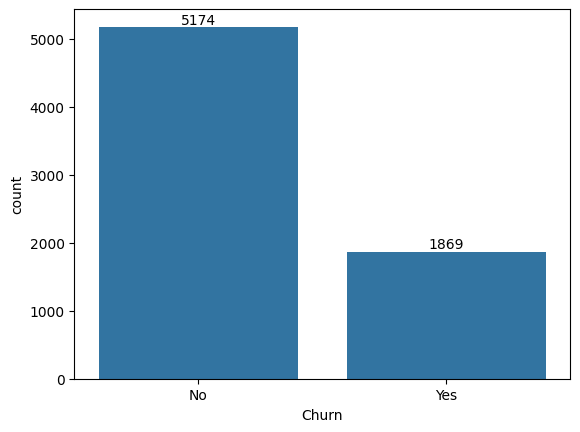

In [14]:
ax = sns.countplot(x='Churn', data=df)

ax.bar_label(ax.containers[0])
plt.show()

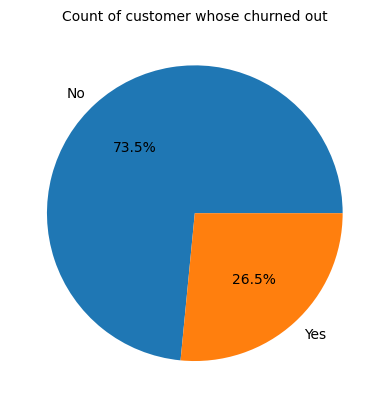

In [15]:
plt.pie(df['Churn'].value_counts(), labels=df['Churn'].value_counts().index, autopct='%1.1f%%')
plt.title('Count of customer whose churned out',fontsize = 10)
plt.show()

from the given pie chart we conclude that  26.5 customers have churned out. SO find out the reason behind it

# Gender and senoir citixen basis churn out

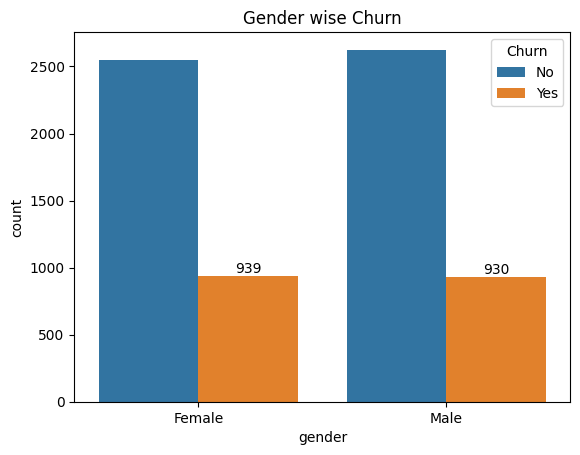

In [16]:
bx = sns.countplot(x='gender', data=df ,hue = 'Churn')
bx.bar_label(bx.containers[1])
plt.title("Gender wise Churn")
plt.show()

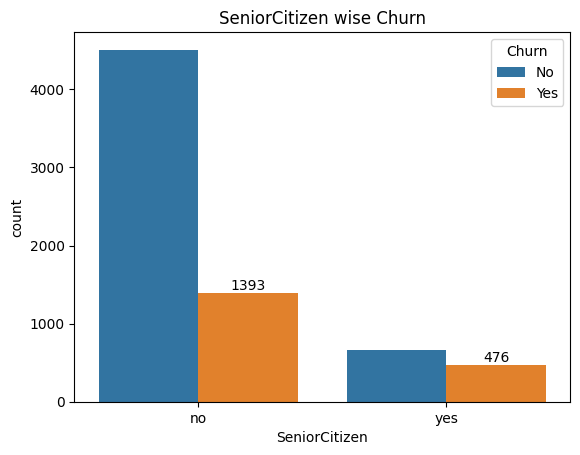

In [17]:
bx = sns.countplot(x='SeniorCitizen', data=df ,hue = 'Churn')
bx.bar_label(bx.containers[1])
plt.title("SeniorCitizen wise Churn")
plt.show()

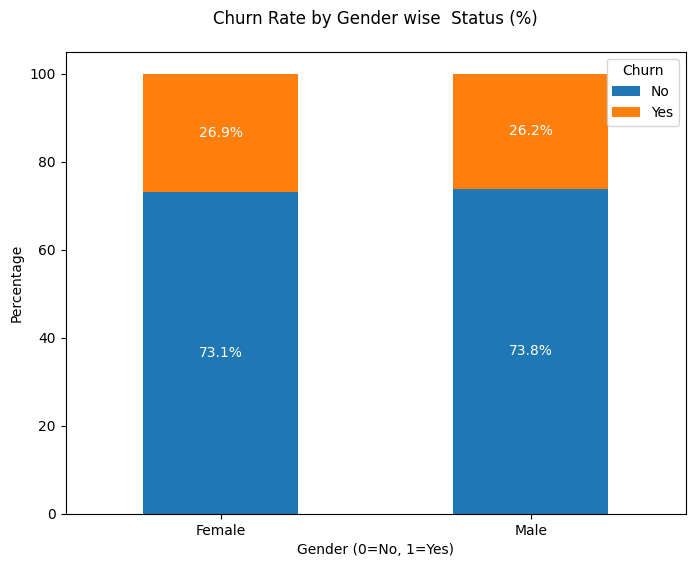

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Create cross-tabulation with percentages
cross_tab = pd.crosstab(df['gender'], df['Churn'], normalize='index') * 100

# 2. Plot stacked bars
ax = cross_tab.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], figsize=(8,6))

# 3. Add percentage labels
for container in ax.containers:
    ax.bar_label(container,
                label_type='center',
                fmt='%.1f%%',
                color='white',
                fontsize=10)

# Customize plot
plt.title('Churn Rate by Gender wise  Status (%)', pad=20)
plt.xlabel('Gender (0=No, 1=Yes)')
plt.ylabel('Percentage')
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

<Figure size 200x400 with 0 Axes>

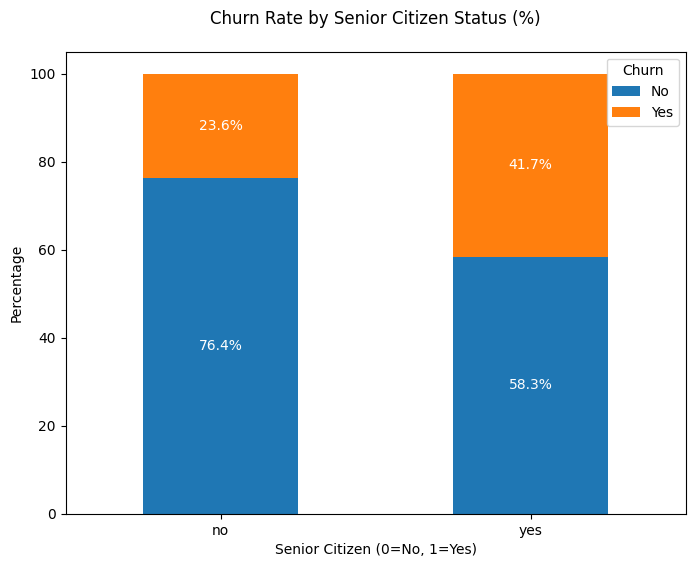

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.figure(figsize=(2,4))

# 1. Create cross-tabulation with percentages
cross_tab = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100

# 2. Plot stacked bars
ax = cross_tab.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], figsize=(8,6))

# 3. Add percentage labels
for container in ax.containers:
    ax.bar_label(container,
                label_type='center',
                fmt='%.1f%%',
                color='white',
                fontsize=10)

# Customize plot
plt.title('Churn Rate by Senior Citizen Status (%)', pad=20)
plt.xlabel('Senior Citizen (0=No, 1=Yes)')
plt.ylabel('Percentage')
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

Comparatively a greated percentage of people in senior citizen have churned

# CHURN OUT BASIS ON TENURE

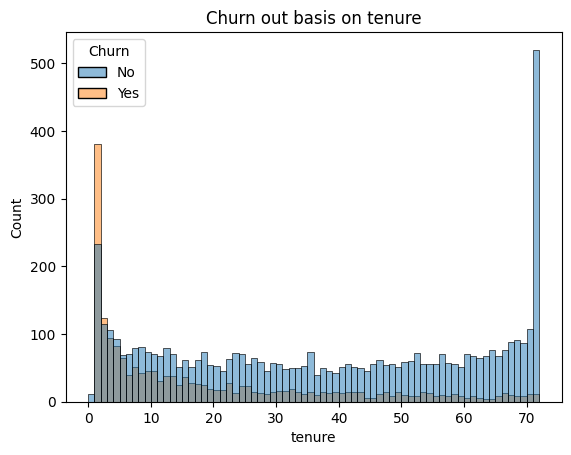

In [20]:
sns.histplot(x = 'tenure', data = df, hue = 'Churn', bins = 72)
plt.title('Churn out basis on tenure')
plt.show()

Most of the people churned out within his intial months.

people have used our services fro a long time have stayed and people who have usedour services 1 or 2 months have churned..

# Contract basis churn out

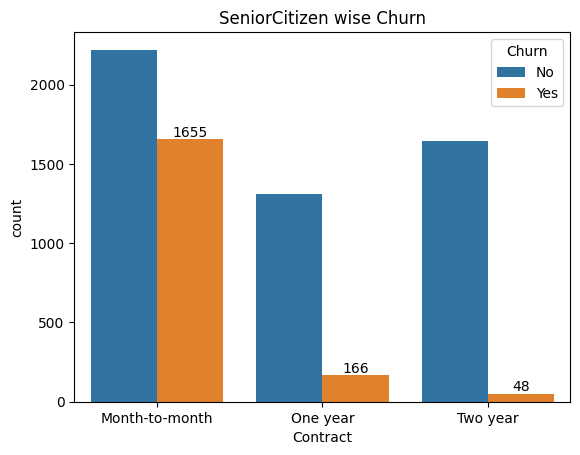

In [21]:
bx = sns.countplot(x='Contract', data=df ,hue = 'Churn')
bx.bar_label(bx.containers[1])
plt.title("SeniorCitizen wise Churn")
plt.show()

People who have one to one contract are likely to churn quickly. SO our take is to convinces people fro yearly contact ..

# Sevices wise churn out

In [22]:
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'total Charges'],
      dtype='object')

In [23]:
sevice_cols = ['PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies']

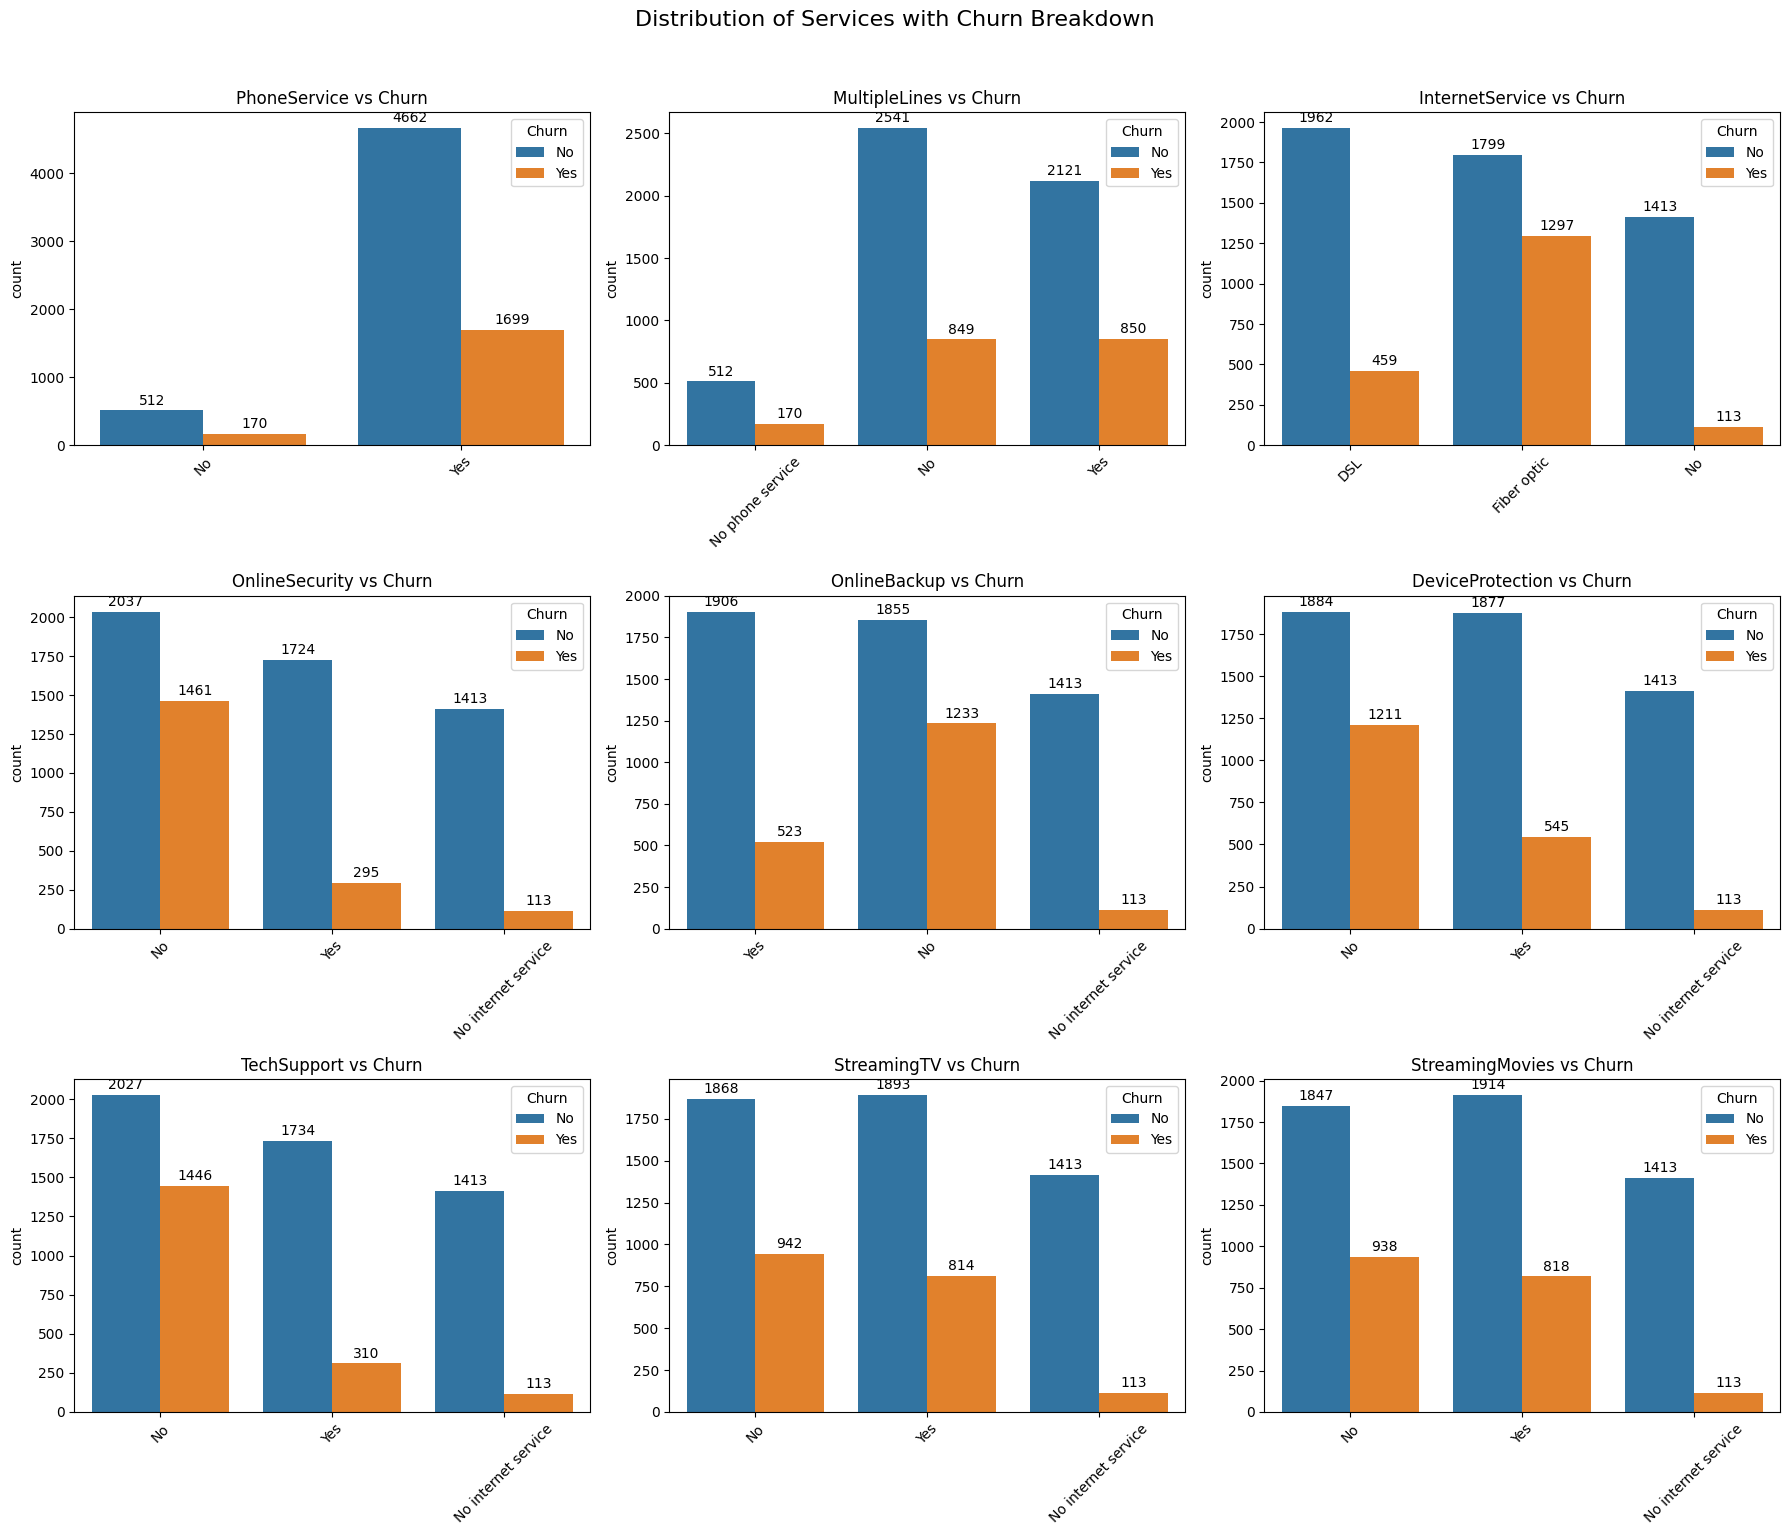

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to plot
service_cols = ['PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up subplots (3 rows x 3 columns)
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('Distribution of Services with Churn Breakdown', fontsize=16, y=1.02)

# Flatten axes for easy iteration
axes = axes.flatten()

# Create countplot for each column
for i, col in enumerate(sevice_cols):
    sns.countplot(
        x=col,
        data=df,
        hue='Churn',
        ax=axes[i],
        palette=['#1f77b4', '#ff7f0e']  # Blue for No, Orange for Yes
    )
    axes[i].set_title(f'{col} vs Churn')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=45)

    # Add percentage labels on top of bars
    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='%g', label_type='edge', padding=2)

# Remove empty subplots (if any)
for j in range(len(service_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Customers without phone service rarely churn (low base).

Those with multiple lines churn more (likely due to higher bills).

Fiber optic users churn most (≈40-50% of this group) – possibly due to poor reliability/high cost.

DSL users are more stable.

Customers without online security/tech support churn 2–3× more than those with these services.




*****
Top 3 Churn Drivers:

Fiber optic internet (high cost/expectations)

Lack of tech support (frustration with issues)

Multiple phone lines (bill shock) *




# PAymethod churn

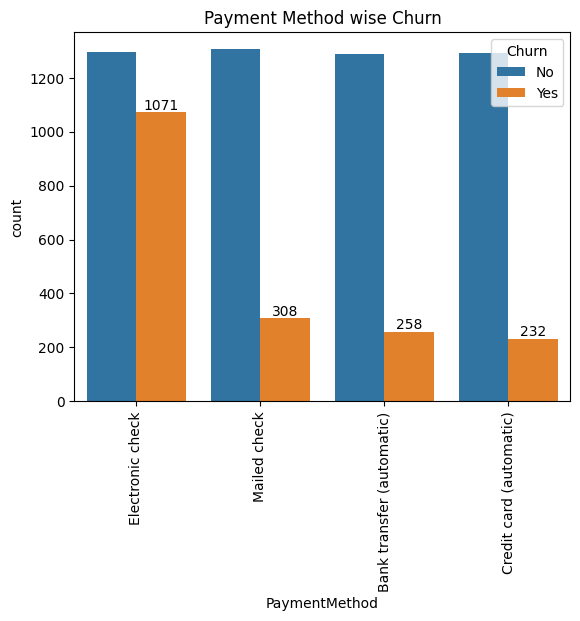

<Figure size 600x400 with 0 Axes>

In [25]:
bx = sns.countplot(x='PaymentMethod', data=df ,hue = 'Churn')
bx.bar_label(bx.containers[1])
plt.title("Payment Method wise Churn")
plt.xticks(rotation=90)
plt.figure(figsize=(6,4))
plt.show()

Customer is likely to churn who has using electronic check methods